# k-means用于图像压缩

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.io as sio

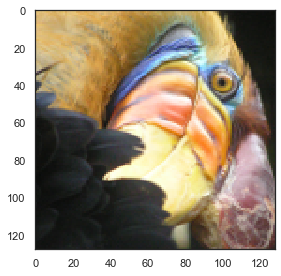

In [2]:
from skimage import io

sns.set(context="notebook", style="white")
pic = io.imread('data/bird_small.png') / 255
io.imshow(pic)
plt.show()

In [3]:
pic.shape

(128, 128, 3)

In [4]:
data = pic.reshape(128*128, 3)

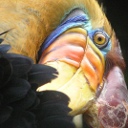

In [5]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [6]:
image_data = sio.loadmat('data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [7]:
A = image_data['A']
A.shape

(128, 128, 3)

对数据预处理提供给K-means算法

In [8]:
#归一化数据 因为每个像素都是三通道的rgb数据
A = A / 255.

#reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))  #128*128,3
X.shape

(16384, 3)

In [9]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [10]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [11]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [12]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [13]:
#randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

#run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

#get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

#map each pixel to the centroids value
X_recovered = centroids[idx.astype(int), :]
X_recovered.shape


(16384, 3)

In [14]:
#reshape to the original dimensions
X_recovered  = np.reshape(X_recovered,(A.shape[0] , A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

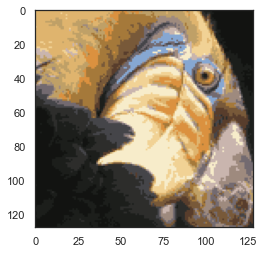

In [15]:
plt.imshow(X_recovered)
plt.show()

用scikit-learn来实现K-means

In [16]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
""" 
n_cluster:生成的聚类数
n_init:不同质心初始化值运行算法的次数
n_jobs:计算所用的进程数，同时进行n_init指定次数的计算 -1表示用所有的cpu计算
"""

' \nn_cluster:生成的聚类数\nn_init:不同质心初始化值运行算法的次数\nn_jobs:计算所用的进程数，同时进行n_init指定次数的计算 -1表示用所有的cpu计算\n'

In [17]:
model.fit(data)

D:\Programmingtools\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [18]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [19]:
centroids[C].shape

(16384, 3)

In [20]:
compresse_pic = centroids[C].reshape((128,128,3))

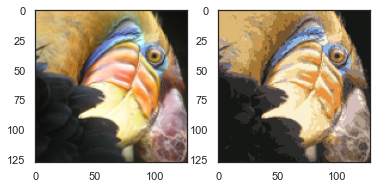

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(pic)
ax[1].imshow(compresse_pic)
plt.show()